# Introduction

Here, we use a different python virtual environment (controlled by us, so we can install pacakges, unlike ROOT's default python environment

We will use sklearn, pandas, matplotlib, numpy, etc to play around with different ML models for fitting the spectra.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
h = pd.read_json('./Ch11_ADC.json',)

In [7]:
h.head(99)

,bin_center,bin_content,bin_idx,bin_left_edge,bin_right_edge
0,0.5,0,1,0,1
1,1.5,0,2,1,2
2,2.5,0,3,2,3
3,3.5,0,4,3,4
4,4.5,0,5,4,5
5,5.5,0,6,5,6
6,6.5,0,7,6,7
7,7.5,0,8,7,8
8,8.5,0,9,8,9
9,9.5,0,10,9,10


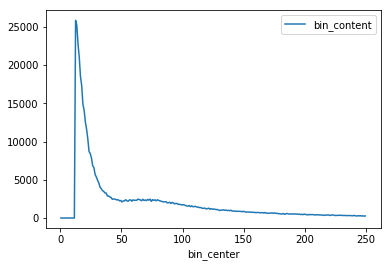

In [5]:
h.plot(x='bin_center', y='bin_content')

To understand the above plot, we need to make some assumptions about what generates the shape we see. The fewer assumptions we make, the more generalizable we might be able to make the model.

One simple approach might be to assume that we are observing an exponential background with a gaussian on top. In this case, we can fit both separately by fitting the background, subtracting, and then fitting the remaining gaussian. This can of course be done in root with parameterized functions.

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel as C

In [95]:
domain_filter = ( ( h['bin_center'] > 12 )  & ( h['bin_center'] < 35 ) | ( h['bin_center'] > 150 ) )

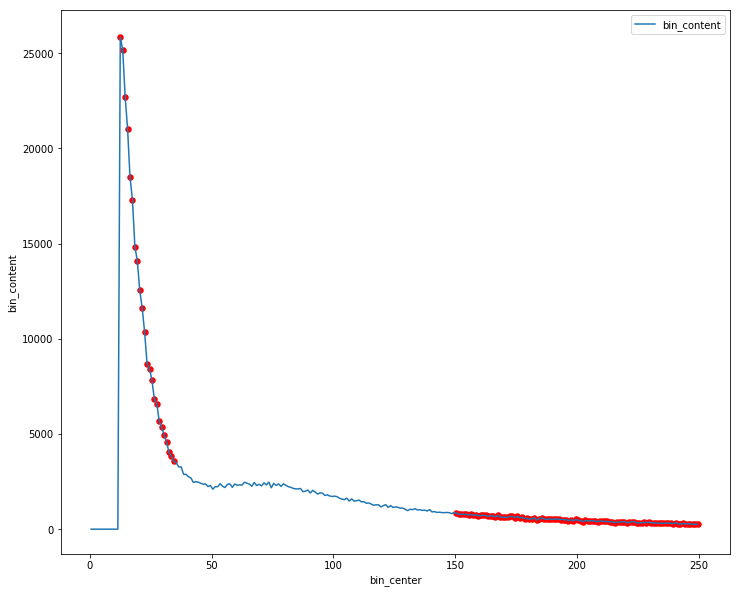

In [96]:
fig, ax = plt.subplots(figsize=(12,10))
h.plot(x='bin_center', y='bin_content', ax=ax)
h[domain_filter].plot(kind='scatter', x='bin_center', y='bin_content', ax=ax, linewidth=2, color='r')

In [100]:
# Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# kernel = 1 * RBF(10)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
X = [[X] for X in h[domain_filter]['bin_center'].values] # fancy bs to match the API requirements.
y = [[y] for y in h[domain_filter]['bin_content'].values] # fancy bs to match the API requirements
gp.fit(X,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [101]:
X_test = np.linspace(0, 250, 1000).reshape(-1,1)
y_test = gp.predict(X_test)

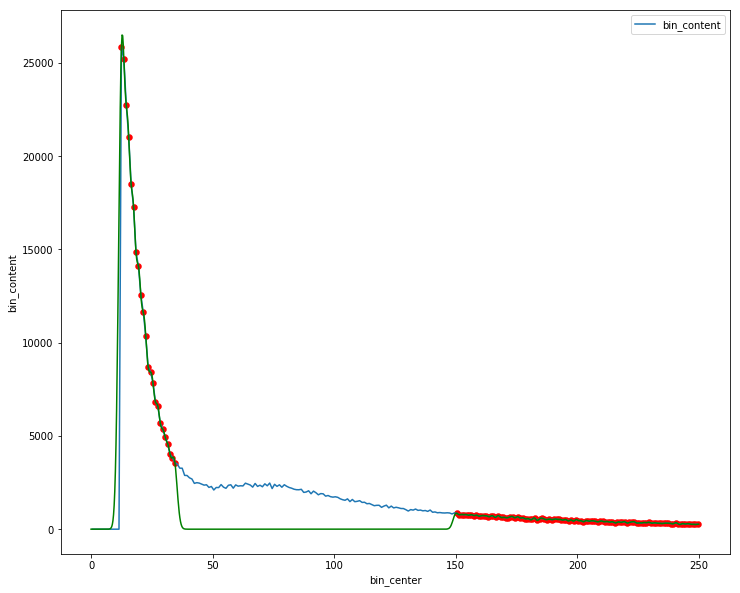

In [102]:
fig, ax = plt.subplots(figsize=(12,10))
h.plot(x='bin_center', y='bin_content', ax=ax)
h[domain_filter].plot(kind='scatter', x='bin_center', y='bin_content', ax=ax, linewidth=2, color='r')
ax.plot(X_test, y_test, color='g')